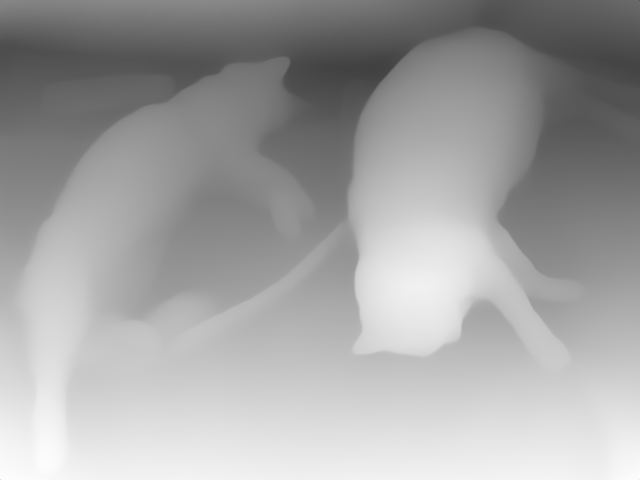

In [1]:
import requests
from PIL import Image
from transformers import pipeline

# load pipe
pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")

# load image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# inference
depth = pipe(image)["depth"]

depth

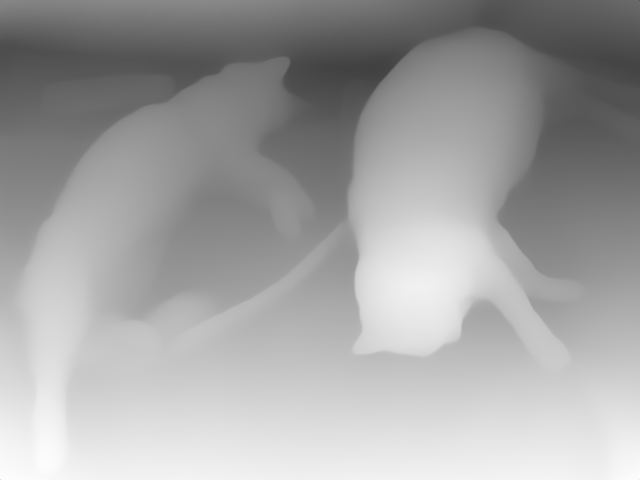

In [2]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("LiheYoung/depth-anything-small-hf")
model = AutoModelForDepthEstimation.from_pretrained("LiheYoung/depth-anything-small-hf")

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

depth

In [3]:
from transformers import DepthAnythingConfig, DepthAnythingForDepthEstimation

# Initializing a DepthAnything small style configuration
configuration = DepthAnythingConfig()

# Initializing a model from the DepthAnything small style configuration
model = DepthAnythingForDepthEstimation(configuration)

# Accessing the model configuration
configuration = model.config
configuration

DepthAnythingConfig {
  "_commit_hash": null,
  "backbone": null,
  "backbone_config": {
    "hidden_size": 384,
    "image_size": 518,
    "model_type": "dinov2",
    "num_attention_heads": 6,
    "out_features": [
      "stage9",
      "stage10",
      "stage11",
      "stage12"
    ],
    "out_indices": [
      9,
      10,
      11,
      12
    ],
    "reshape_hidden_states": false
  },
  "fusion_hidden_size": 64,
  "head_hidden_size": 32,
  "head_in_index": -1,
  "initializer_range": 0.02,
  "model_type": "depth_anything",
  "neck_hidden_sizes": [
    48,
    96,
    192,
    384
  ],
  "patch_size": 14,
  "reassemble_factors": [
    4,
    2,
    1,
    0.5
  ],
  "reassemble_hidden_size": 384,
  "transformers_version": null,
  "use_pretrained_backbone": false
}

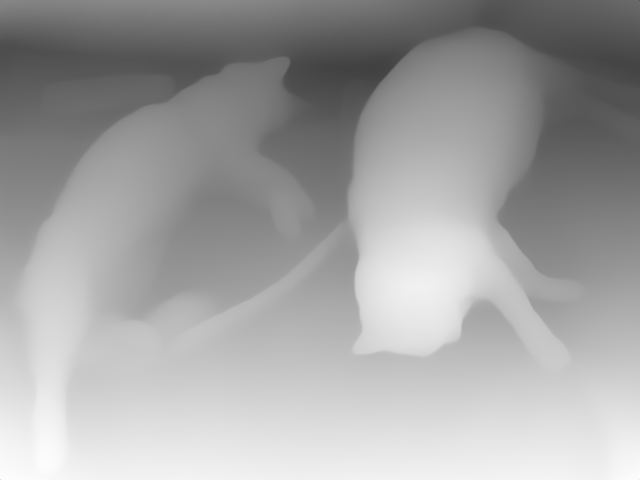

In [4]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("LiheYoung/depth-anything-small-hf")
model = AutoModelForDepthEstimation.from_pretrained("LiheYoung/depth-anything-small-hf")

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

depth

In [5]:
from transformers import Dinov2Config, DPTConfig, DPTForDepthEstimation

# initialize with a Transformer-based backbone such as DINOv2
# in that case, we also specify `reshape_hidden_states=False` to get feature maps of shape (batch_size, num_channels, height, width)
backbone_config = Dinov2Config.from_pretrained(
    "facebook/dinov2-base", out_features=["stage1", "stage2", "stage3", "stage4"], reshape_hidden_states=False
)

config = DPTConfig(backbone_config=backbone_config)
model = DPTForDepthEstimation(config=config)
model

DPTForDepthEstimation(
  (backbone): Dinov2Backbone(
    (embeddings): Dinov2Embeddings(
      (patch_embeddings): Dinov2PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Dinov2Encoder(
      (layer): ModuleList(
        (0-11): 12 x Dinov2Layer(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attention): Dinov2Attention(
            (attention): Dinov2SelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): Dinov2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
         

In [6]:
from transformers import DPTModel, DPTConfig

# Initializing a DPT dpt-large style configuration
configuration = DPTConfig()

# Initializing a model from the dpt-large style configuration
model = DPTModel(configuration)

# Accessing the model configuration
configuration = model.config
configuration

DPTConfig {
  "_commit_hash": null,
  "add_projection": false,
  "attention_probs_dropout_prob": 0.0,
  "auxiliary_loss_weight": 0.4,
  "backbone": null,
  "backbone_config": null,
  "backbone_featmap_shape": null,
  "backbone_kwargs": null,
  "backbone_out_indices": [
    2,
    5,
    8,
    11
  ],
  "fusion_hidden_size": 256,
  "head_in_index": -1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_hybrid": false,
  "layer_norm_eps": 1e-12,
  "model_type": "dpt",
  "neck_hidden_sizes": [
    96,
    192,
    384,
    768
  ],
  "neck_ignore_stages": [],
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "readout_type": "project",
  "reassemble_factors": [
    4,
    2,
    1,
    0.5
  ],
  "semantic_classifier_dropout": 0.1,
  "semantic_loss_ignore_index": 255,
  "transformers_version": null,
  "use_auxili

In [7]:
from transformers import AutoImageProcessor, DPTModel
import torch
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

image_processor = AutoImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTModel.from_pretrained("Intel/dpt-large")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

/Users/maryam/Library/Caches/pypoetry/virtualenvs/depth-aware-object-detection-zcMtcJV--py3.10/lib/python3.10/site-packages/datasets/load.py:1454: FutureWarning: The repository for huggingface/cats-image contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/huggingface/cats-image
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/Users/maryam/Library/Caches/pypoetry/virtualenvs/depth-aware-object-detecti

[1, 577, 1024]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


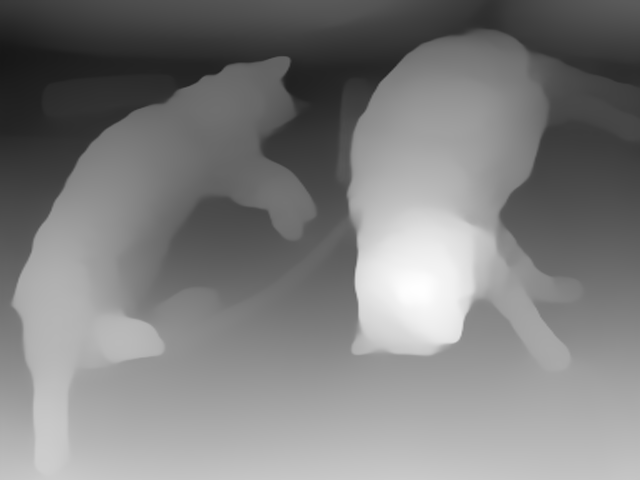

In [8]:
from transformers import AutoImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
depth

In [9]:
from transformers import AutoImageProcessor, DPTForSemanticSegmentation
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("Intel/dpt-large-ade")
model = DPTForSemanticSegmentation.from_pretrained("Intel/dpt-large-ade")

inputs = image_processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits
logits

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of DPTForSemanticSegmentation were not initialized from the model checkpoint at Intel/dpt-large-ade and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.batch_norm1.bias', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.num_batches_tracked', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.running_mean', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.running_var', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.weight', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.bias', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.num_batches_tracked', 'neck.fusion_stage.layers.0.resid

tensor([[[[ 4.0480e+00,  4.2420e+00,  4.4360e+00,  ...,  3.5482e+00,
            3.3962e+00,  3.2441e+00],
          [ 4.3124e+00,  4.5693e+00,  4.8262e+00,  ...,  3.8282e+00,
            3.5552e+00,  3.2823e+00],
          [ 4.5768e+00,  4.8966e+00,  5.2163e+00,  ...,  4.1082e+00,
            3.7143e+00,  3.3204e+00],
          ...,
          [ 4.6027e+00,  4.9196e+00,  5.2366e+00,  ...,  3.9735e+00,
            3.7126e+00,  3.4518e+00],
          [ 4.2931e+00,  4.5786e+00,  4.8642e+00,  ...,  3.6316e+00,
            3.4208e+00,  3.2100e+00],
          [ 3.9834e+00,  4.2376e+00,  4.4919e+00,  ...,  3.2897e+00,
            3.1290e+00,  2.9682e+00]],

         [[ 2.5144e+00,  2.6593e+00,  2.8041e+00,  ...,  2.6157e+00,
            2.5181e+00,  2.4205e+00],
          [ 2.6814e+00,  2.8087e+00,  2.9359e+00,  ...,  2.6491e+00,
            2.5761e+00,  2.5032e+00],
          [ 2.8485e+00,  2.9581e+00,  3.0678e+00,  ...,  2.6824e+00,
            2.6341e+00,  2.5859e+00],
          ...,
     

In [10]:
from transformers import pipeline

checkpoint = "vinvino02/glpn-nyu"
depth_estimator = pipeline("depth-estimation", model=checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


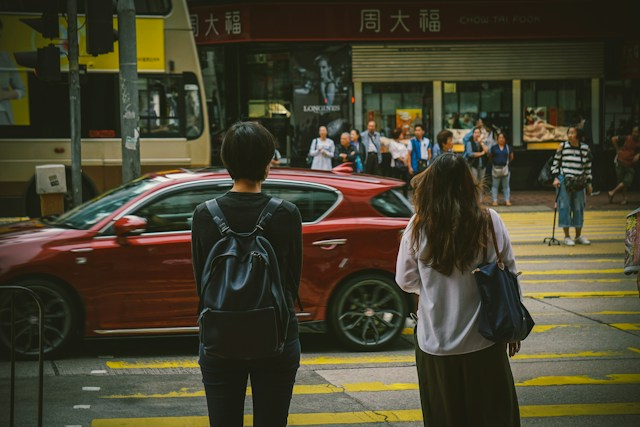

In [11]:
from PIL import Image
import requests

url = "https://unsplash.com/photos/HwBAsSbPBDU/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MzR8fGNhciUyMGluJTIwdGhlJTIwc3RyZWV0fGVufDB8MHx8fDE2Nzg5MDEwODg&force=true&w=640"
image = Image.open(requests.get(url, stream=True).raw)
image

In [12]:
predictions = depth_estimator(image)

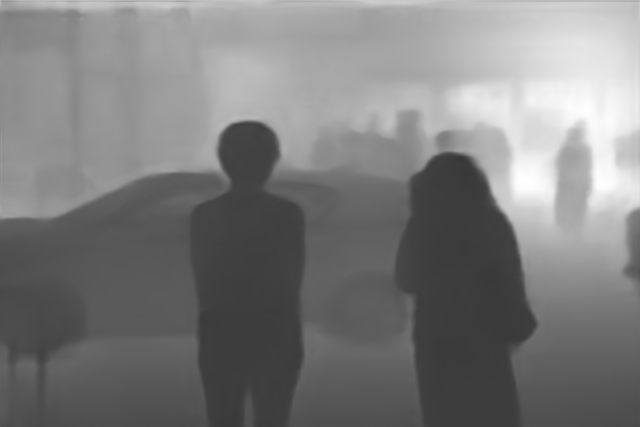

In [13]:
predictions["depth"]

In [14]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation

checkpoint = "vinvino02/glpn-nyu"

image_processor = AutoImageProcessor.from_pretrained(checkpoint)
model = AutoModelForDepthEstimation.from_pretrained(checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [15]:
pixel_values = image_processor(image, return_tensors="pt").pixel_values

In [16]:
import torch

with torch.no_grad():
    outputs = model(pixel_values)
    predicted_depth = outputs.predicted_depth

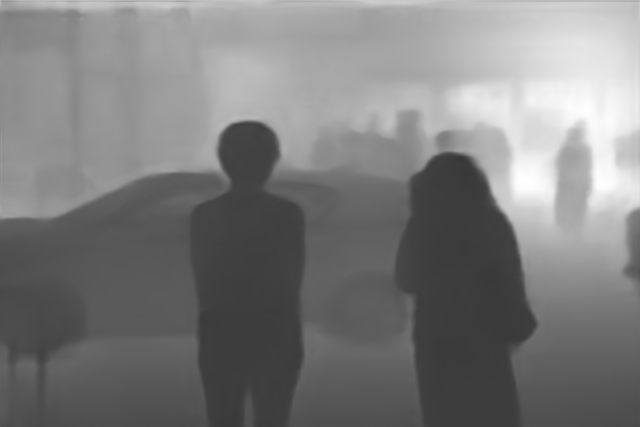

In [17]:
import numpy as np
from da_od.config import output_img

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
).squeeze()
output = prediction.numpy()

formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
depth.save(output_img / "depth_image.png", "PNG")
depth

[2024-02-21 18:16:26] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /Users/maryam/sg_logs/console.log


[2024-02-21 18:16:26] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-02-21 18:16:26,492] torch.distributed.elastic.multiprocessing.redirects: [WARNING] NOTE: Redirects are currently not supported in Windows or MacOs.
[2024-02-21 18:16:27] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-02-21 18:16:27] WARNING - export.py - Failed to import pytorch_quantization
[2024-02-21 18:16:27] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-02-21 18:16:27] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.
[2024-02-21 18:16:28] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with

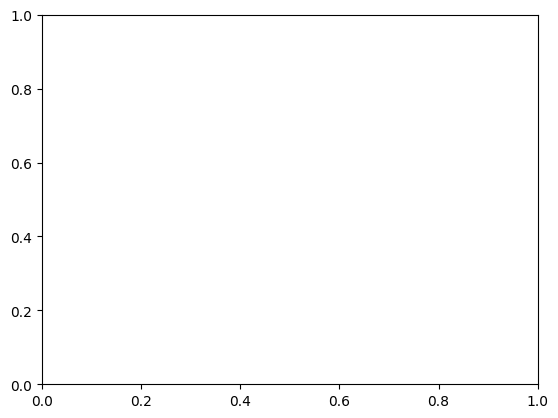

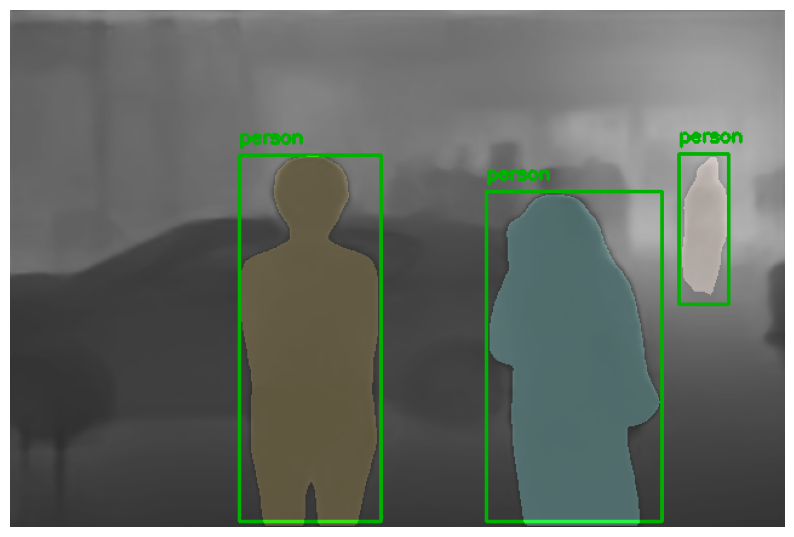

In [18]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np

from da_od.config import class_names, output_img, sam_weights
from da_od.model import seg_sam, yolo_nas
from da_od.segment_anything import SamAutomaticMaskGenerator, SamPredictor

image_path = output_img / "depth_image.png"
class_names_file = class_names / "coco.names.txt"
output_folder_path = output_img / "segmentation.jpg"
checkpoint_path = sam_weights / "sam_vit_h_4b8939.pth"


def read_class_names(file_path):
    with open(file_path) as file:
        class_names = [line.strip() for line in file.readlines()]
    return class_names


classNames = read_class_names(class_names_file)

bboxes, confidence, labels, class_names, image = yolo_nas.get_object_detection(image_path)

# Instantiate mask generator
mask_generator = SamAutomaticMaskGenerator(seg_sam.get_model(checkpoint_path))
mask = mask_generator.generate(image)
seg_sam.show_anns(mask)

# Create a predictor for SAM
image = cv2.imread(str(image_path))
predictor = SamPredictor(seg_sam.get_model(checkpoint_path))
predictor.set_image(image)

# Initialize a combined mask
combined_mask = np.zeros((image.shape[0], image.shape[1], 3))

# Loop through detections
for i, label in enumerate(labels):
    input_box = np.array(bboxes[i])

    # Predict mask using SAM
    mask, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )

    # Get the correct class label
    cls = int(label)
    class_name = classNames[cls]

    # Draw bounding box
    x_min, y_min, x_max, y_max = input_box
    cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

    # Add label
    cv2.putText(
        image,
        class_name,
        (int(x_min), int(y_min) - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 255, 0),
        2,
    )

    # Generate random color for mask
    random_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    mask_color = np.array(random_color)

    # Add the mask to the combined mask with the random color
    combined_mask += mask[0][..., None] * mask_color

# Overlay the original image with the combined mask
final_image = cv2.addWeighted(image, 0.7, combined_mask.astype(np.uint8), 0.3, 0)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis("off")
plt.savefig(output_folder_path)  # Save the combined output
plt.show()

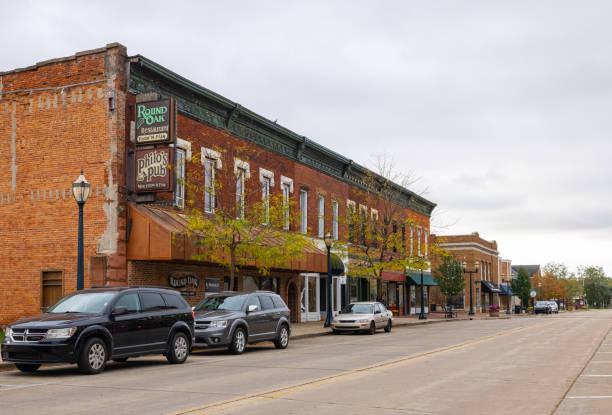

In [22]:
from transformers import pipeline
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [23]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/Users/maryam/Library/Caches/pypoetry/virtualenvs/depth-aware-object-detection-zcMtcJV--py3.10/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:102: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

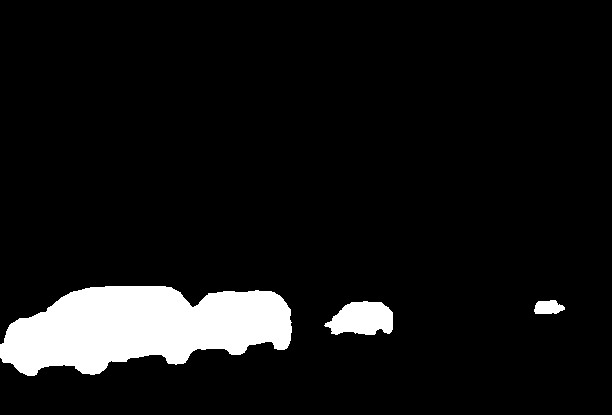

In [37]:
results[-1]["mask"]

In [38]:
from transformers import pipeline

segmenter = pipeline(task="image-segmentation")
preds = segmenter(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

[2024-02-21 18:39:01] INFO - _builder.py - Loading pretrained weights from Hugging Face hub (timm/resnet50.a1_in1k)


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

[2024-02-21 18:39:09] INFO - _hub.py - [timm/resnet50.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
[2024-02-21 18:39:09] INFO - _builder.py - Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassificatio

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
`label_ids_to_fuse` unset. No instance will be fused.


{'score': 0.9879, 'label': 'LABEL_184'}
{'score': 0.9973, 'label': 'snow'}
{'score': 0.9972, 'label': 'cat'}
